#Image Normalization and Standardization in Deep Learning
##Why Normalize and Standardize Images?
Image normalization and standardization are crucial preprocessing steps in deep learning for several reasons:

 - Helps neural networks converge faster
 - Prevents numerical instability during training
 - Makes training more consistent across different datasets



Different Types:

- Normalization: Scales values to a fixed range (like [0,1] or [-1,1])
- Standardization: Transforms data to have mean=0 and standard deviation=1


Benefits:

- Reduces the effect of varying lighting conditions
- Makes different images more comparable
- Helps prevent vanishing/exploding gradients
- Makes the learning process more efficient

In [1]:
# Install TensorFlow (if not installed)
!pip install tensorflow matplotlib numpy

In [ ]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load Fashion MNIST dataset
# Fashion MNIST contains 70,000 grayscale images (28x28 pixels) of clothing items
(X_train, _), (X_test, _) = fashion_mnist.load_data()

In [ ]:
# Select and prepare a sample image
sample_image = X_test[5]  # Select one test image


In [ ]:
sample_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 188, 181,
        189, 157, 165, 188, 176, 179, 181,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 235, 213, 213,
        223, 225, 217, 214, 204, 211, 189,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 234, 217, 211,
        217, 200, 203, 217, 203, 179, 170,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 252, 205, 209,
        219, 193, 195, 212, 207, 194, 204,  51,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 204, 228, 184, 206,
        215, 221, 212, 209, 199, 190, 227, 105,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 244, 192, 193, 212,
        217, 210, 216, 216, 194, 175, 225, 131,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 247, 170, 192, 210,
        211, 239, 231, 219, 199, 179, 217, 124,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  49, 236, 170, 193, 201,
        220, 187, 231, 230, 206, 181, 213, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  87, 232, 159, 193, 200,
        245,   0, 207, 245, 200, 176, 210, 109,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 221, 170, 189, 216,
        225,   0, 151, 254, 198, 183, 209, 103,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 206, 176, 185, 242,
        146,   0,  53, 255, 201, 183, 205, 100,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 177, 197, 175, 189, 247,
         34,   0,   0, 253, 203, 180, 199,  97,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 172, 186, 174, 199, 223,
          0,   0,   0, 234, 204, 162, 199, 106,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 154, 177, 174, 211, 151,
          0,   0,   0, 210, 202, 141, 180, 108,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 141, 171, 175, 246,  70,
          0,   2,   0, 177, 204, 121, 145, 136,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 135, 179, 191, 248,  28,
          0,   5,   0, 134, 210, 107, 142, 119,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  90, 189, 198, 211,   4,
          0,   3,   0,  59, 244, 118, 165, 123,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 187, 195, 225,  70,
          0,   4,   0,  20, 215, 116, 167, 137,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 182, 199, 221, 163,
          0,   0,   0,   0, 238, 147, 179, 129,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 194, 208, 213, 217,
          0,   0,   0,   0, 246, 197, 203, 138,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 225, 206, 201,
          0,   0,   0,   0, 215, 215, 221, 140,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 219, 204, 217,
         34,   0,   0,   0, 202, 215, 224, 123,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203, 214, 223,
         88,   0,   0,   0, 196, 219, 230, 130,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 133, 217, 217,
        167,   0,   0,   0, 184, 221, 232, 132,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# Convert to float32 for more precise calculations
sample_image = sample_image.astype(np.float32)

In [ ]:
# Function for Min-Max Normalization (0 to 1)
def normalize_0_1(image):
    """
    Normalize pixel values to range [0,1]
    Original pixels: 0-255
    Formula: pixel_value / 255
    Good for: Neural networks with sigmoid activation
    """
    return image / 255.0

In [ ]:
# Function for Normalization (-1 to 1)
def normalize_minus1_1(image):
    """
    Normalize pixel values to range [-1,1]
    Original pixels: 0-255
    Formula: (pixel_value / 127.5) - 1
    Good for: Neural networks with tanh activation
    """
    return (image / 127.5) - 1

In [ ]:
# Function for Z-score Standardization
def standardize(image):
    """
    Standardize pixels to have mean=0 and std=1
    Formula: (x - mean(x)) / std(x)
    Good for: Making features comparable and normally distributed
    """
    return (image - np.mean(image)) / np.std(image)

In [ ]:
# Function to reduce the resolution of an image
def reduce_resolution(image, target_size=(128, 128)):
    """
    Reduce the resolution of an image by resizing it.
    Parameters:
    - image (ndarray or Tensor): Input image.
    - target_size (tuple): Target resolution (height, width).
    Returns:
    - Resized image.
    """
    #Add a channels dimension to the image
    image = tf.expand_dims(image, axis=-1) # Adding channel dimension for grayscale

    # Resize the image
    resized_image = tf.image.resize(image, target_size)

    # Remove the channel dimension for consistency with the original image shape
    resized_image = tf.squeeze(resized_image, axis=-1)

    return resized_image

# Apply resolution reduction to the sample image
reduced_resolution_image = reduce_resolution(sample_image, target_size=(16, 16))  # Example: Reduce to 16x16 pixels


In [ ]:
# Apply different normalization techniques to our sample image
normalized_0_1 = normalize_0_1(sample_image)
normalized_minus1_1 = normalize_minus1_1(sample_image)
standardized_image = standardize(sample_image)

In [ ]:
# Create visualization to compare different techniques
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

(-0.5, 27.5, 27.5, -0.5)

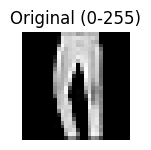

In [ ]:
# Display original image (values 0-255)
plt.subplot(1, 4, 1)
plt.imshow(sample_image, cmap='gray')
plt.title("Original (0-255)")
plt.axis('off')

(-0.5, 15.5, 15.5, -0.5)

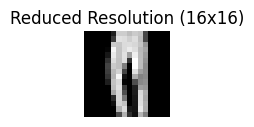

In [ ]:
# Display reduced resolution image
plt.subplot(1, 5, 2)
plt.imshow(reduced_resolution_image.numpy().astype('uint8'), cmap='gray')
plt.title("Reduced Resolution (16x16)")
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

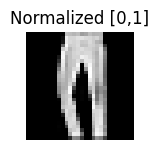

In [ ]:
# Display image normalized to [0,1]
plt.subplot(1, 4, 2)
plt.imshow(normalized_0_1, cmap='gray')
plt.title("Normalized [0,1]")
plt.axis('off')

1. Min-Max Normalization to [0, 1]:
The pixel intensities are rescaled to the range of 0 to 1.
The image appears similar to the original but with intensity values compressed into the normalized range, which may slightly affect brightness when viewed directly.

(-0.5, 27.5, 27.5, -0.5)

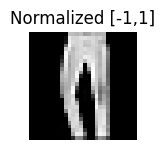

In [ ]:
# Display image normalized to [-1,1]
plt.subplot(1, 4, 3)
plt.imshow(normalized_minus1_1, cmap='gray')
plt.title("Normalized [-1,1]")
plt.axis('off')


2. Normalization to [-1, 1]:
The pixel values are rescaled to the range of -1 to 1.
Similar to the [0, 1] normalization, the image’s visual appearance is preserved, but the mapping to negative values may not be directly interpretable visually.

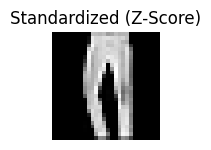

In [ ]:
# Display standardized image
plt.subplot(1, 4, 4)
plt.imshow(standardized_image, cmap='gray')
plt.title("Standardized (Z-Score)")
plt.axis('off')

plt.show()


3. Standardization (Z-Score):
The pixel values are normalized to have a mean of 0 and a standard deviation of 1.
This transformation can make the image appear darker or brighter depending on how values cluster around the mean. The visualization directly reflects intensity deviations from the mean.


In [ ]:
# Print statistics to verify our transformations
print(f"Original Min: {sample_image.min()}, Max: {sample_image.max()}")
print(f"Normalized [0,1] Min: {normalized_0_1.min()}, Max: {normalized_0_1.max()}")
print(f"Normalized [-1,1] Min: {normalized_minus1_1.min()}, Max: {normalized_minus1_1.max()}")
print(f"Standardized Mean: {np.mean(standardized_image):.4f}, Std Dev: {np.std(standardized_image):.4f}")

Original Min: 0.0, Max: 255.0
Normalized [0,1] Min: 0.0, Max: 1.0
Normalized [-1,1] Min: -1.0, Max: 1.0
Standardized Mean: 0.0000, Std Dev: 1.0000


Key Learning Points:

Three Different Approaches:

- [0,1] normalization: Good for sigmoid activation functions
- [-1,1] normalization: Good for tanh activation functions
- Z-score standardization: Good for making features comparable


Practical Applications:

- Different models might prefer different normalizations
- Standardization helps with normally distributed data
- Visual appearance stays similar despite transformation


Verification:

The statistics printed at the end confirm each transformation
- Original values: 0 to 255
- Normalized values: match their target ranges
- Standardized values: mean ≈ 0, std ≈ 1